In [1]:
!pip install ripser persim
#!pip install gudhi

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=536eabda1e5e204b13cc64f9b3b1a6936fcec45f72fc92d694a69bba97e5551f
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


In [1]:
from persim import plot_diagrams
import numpy as np
import plottau as tau
import segment_pd as seg_stat
import matplotlib.pyplot as plt
all_layers_dgm_stl10    = np.load("pd_stl10.npy",allow_pickle=True)
all_layers_dgm_cifar10  = np.load("pd_cifar10.npy",allow_pickle=True)
all_layers_dgm_cifar100 = np.load("pd_cifar100.npy",allow_pickle=True)
all_layers_dgm_aircraft = np.load("pd_aircraft.npy",allow_pickle=True)
model_names =["ResNet18","ResNet50","ResNet101","ResNet152","MobileNetV2","MnasNet1_0",
         "DenseNet-121","DenseNet-169","DenseNet-201"]

The Name of the model  ResNet18
The Number of the models :  9
The Number of layers 12 


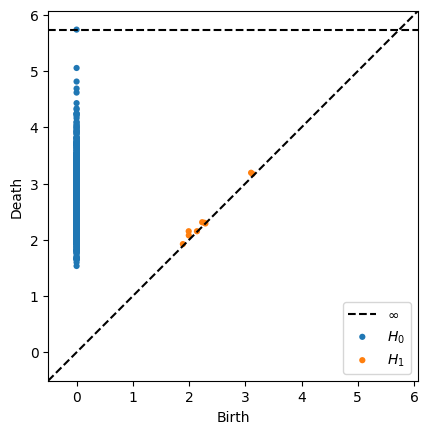

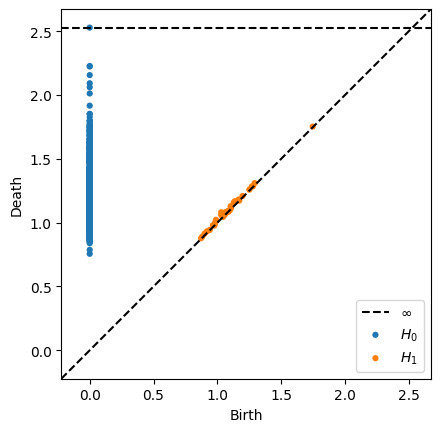

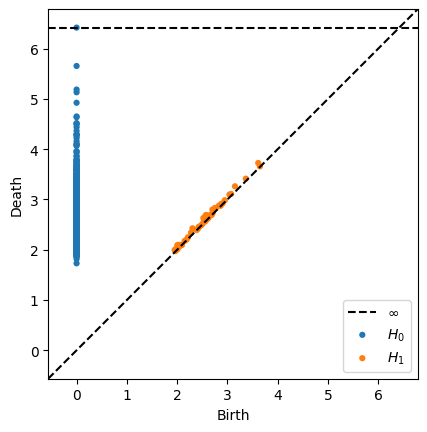

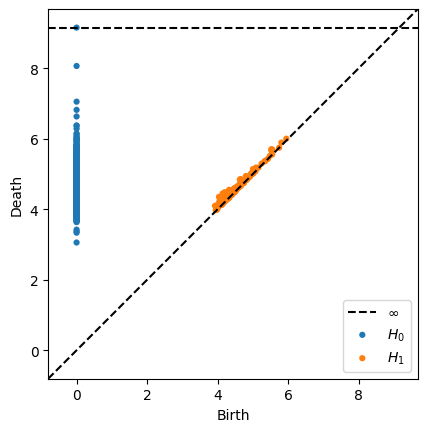

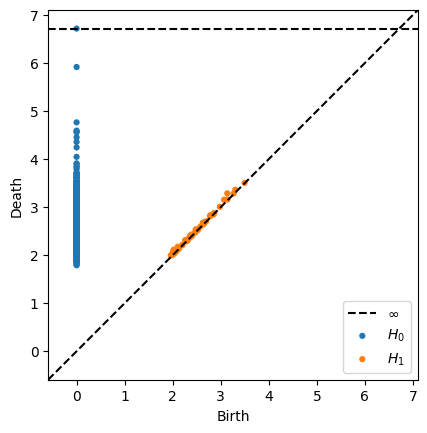

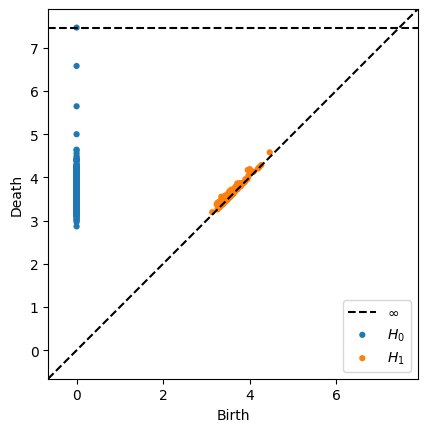

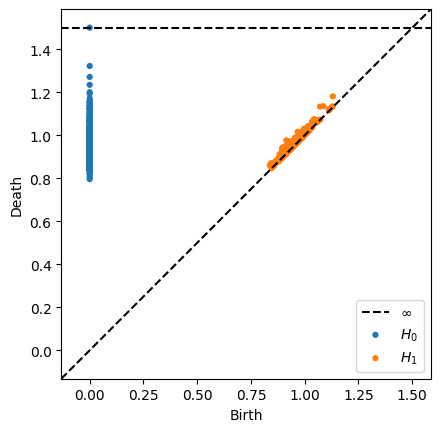

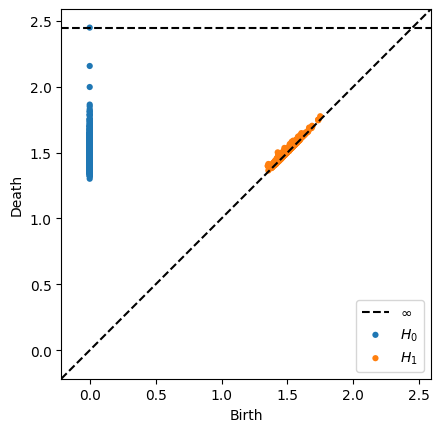

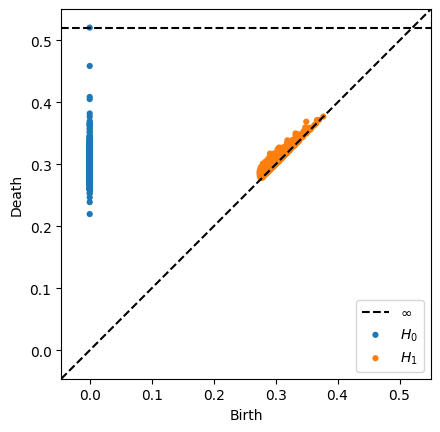

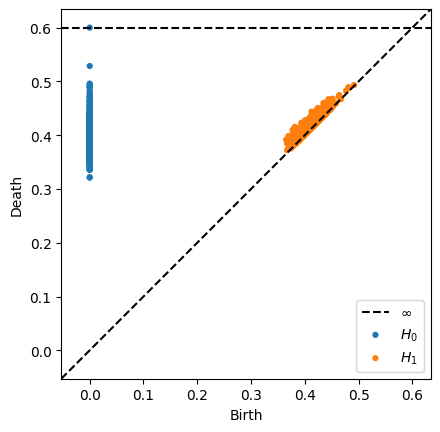

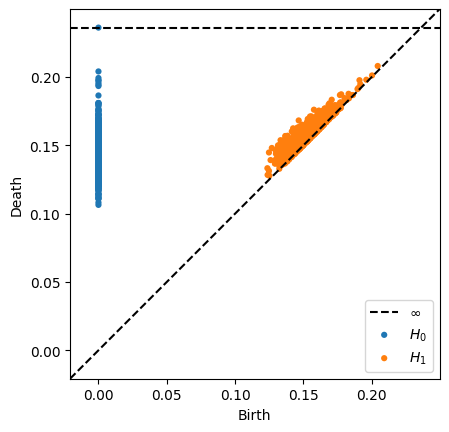

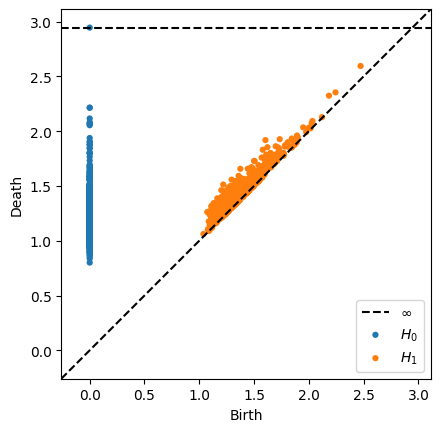

In [2]:
model_name_val = 0 # model 0
model_total = len(all_layers_dgm_stl10)
layers,_,_ = np.asarray(all_layers_dgm_cifar100[model_name_val],dtype=object).shape
print("================\nThe Name of the model ",model_names[model_name_val])
print("The Number of the models : ",model_total)
print("The Number of layers",layers,"\n=====================")
for i in range(layers):
  plot_diagrams(all_layers_dgm_stl10[model_name_val][i][0])
  plt.show()

In [3]:
list_segment_stats_stl10 = seg_stat.stats_for_all(all_layers_dgm_stl10)
list_segment_stats_cifar10 = seg_stat.stats_for_all(all_layers_dgm_cifar10)
list_segment_stats_aircraft = seg_stat.stats_for_all(all_layers_dgm_aircraft)
list_segment_stats_cifar100 = seg_stat.stats_for_all(all_layers_dgm_cifar100)

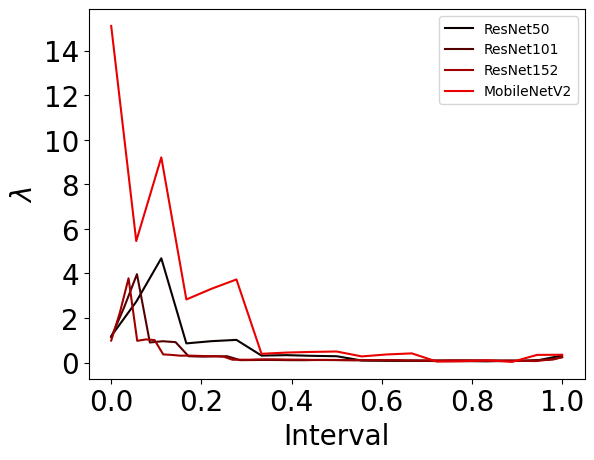

In [4]:
average_life = seg_stat.return_average_life(list_segment_stats=list_segment_stats_stl10[1:5], listx_label=list(range(1,155,20)),list_names = model_names[1:5],n_color=10,name="resnet",plot_=True)

In [ ]:
average_life_cifar100 = seg_stat.return_average_life(list_segment_stats=list_segment_stats_cifar100, listx_label=list(range(1,2,20)),list_names = model_names,n_color=10,name="")
average_life_cifar10 = seg_stat.return_average_life(list_segment_stats=list_segment_stats_cifar10, listx_label=list(range(1,2,20)),list_names = model_names,n_color=10,name="")
average_life_stl10 = seg_stat.return_average_life(list_segment_stats=list_segment_stats_stl10, listx_label=list(range(1,2,20)),list_names = model_names,n_color=10,name="")
average_life_aircraft = seg_stat.return_average_life(list_segment_stats=list_segment_stats_aircraft, listx_label=list(range(1,2,20)),list_names = model_names,n_color=10,name="")

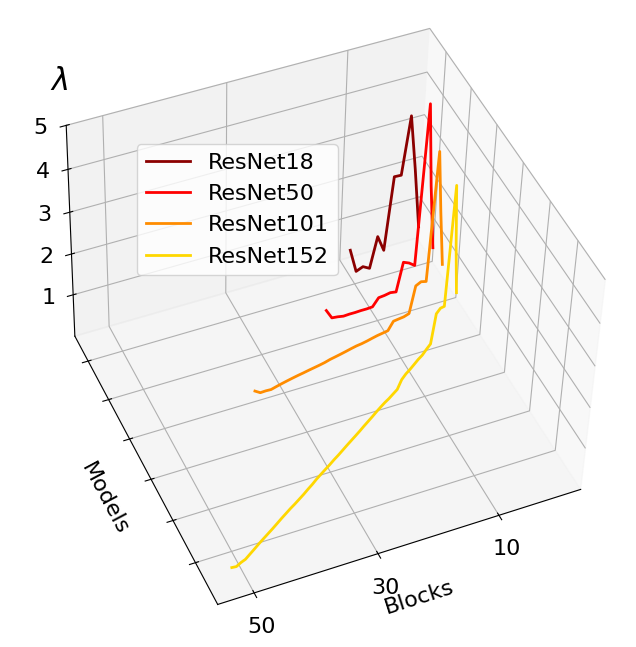

In [6]:
plt.figure(figsize =(8, 8))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zdata = average_life_stl10[0]
ydata = 10+np.asarray(list(range(len(zdata)))) *np.tan(2)
xdata = np.asarray(list(range(len(zdata))))
ax.plot3D(xdata, ydata, zdata, c='darkred',label=model_names[0],linewidth=2);
zdata = average_life_stl10[1]
ydata = 40+np.asarray(list(range(len(zdata))))*np.tan(3)
xdata = np.asarray(list(range(len(zdata))))
ax.plot3D(xdata, ydata, zdata, c='red',label=model_names[1],linewidth=2);
zdata = average_life_stl10[2]
ydata = 60+np.asarray(list(range(len(zdata))))*np.tan(4)
xdata = np.asarray(list(range(len(zdata))))
ax.plot3D(xdata, ydata, zdata, c='darkorange',label=model_names[2],linewidth=2);
zdata = average_life_stl10[3]
ydata = 90+np.asarray(list(range(len(zdata))))*np.tan(1.3)
xdata = np.asarray(list(range(len(zdata))))
ax.plot3D(xdata, ydata, zdata, c='gold',label=model_names[3],linewidth=2);
ax.view_init(45,65,-2)
ax.set_yticklabels([])
# ax.set_xticklabels([])
# ax.set_zticklabels([])
# ax.grid(False)
# plt.axis('off')
ax.set_zticks([1,2,3,4,5])
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.tick_params(axis="z", labelsize=16)
plt.xlabel("Blocks",fontsize=16)
plt.ylabel("Models",fontsize=16)
plt.xticks([10,30,50],fontsize =16)
#ax.set_zlabel(r"$\lambda$",fontsize =16,linespacing=3.4)
ax.text(60, 0, 6.5,'$\lambda$', fontsize = 22)
plt.legend(bbox_to_anchor=(0.55, 0.8),fontsize=16)
plt.savefig('resnet.pdf',bbox_inches='tight',dpi=3000)
plt.show()

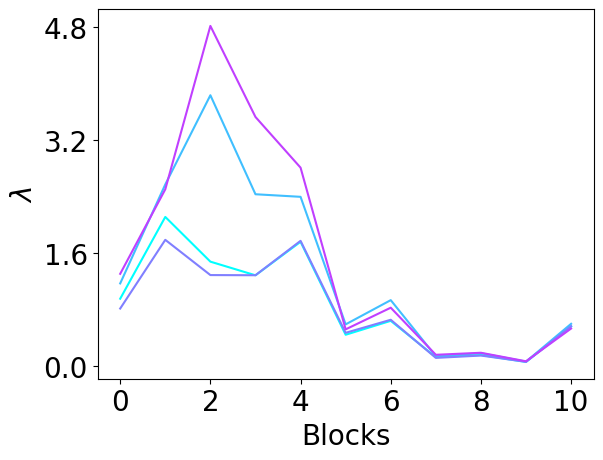

In [17]:
tau.plot_by_data(average_life_cifar10,average_life_stl10,average_life_aircraft,average_life_cifar100,model_names,index=0)

In [7]:
tauval_cifar10 = tau.get_tau(average_life_cifar10)
tauval_stl10 = tau.get_tau(average_life_stl10)
tauval_aircraft = tau.get_tau(average_life_aircraft)
tauval_cifar100 = tau.get_tau(average_life_cifar100)

In [8]:
acc_aircraft = [35.43,37.47,36.99,38.22,39.66,31.26,41.34,44.28,42.06]
acc_stl10 = [94.55,96.55,97.03,97.43,93.49,94.29,96.03,96.54,97.06]
acc_cifar10=[76.35,80.93,83.74,83.03,74.39,73.99,78.52,82.07,82.91]
acc_cifar100=[56.23,60.35,63.68,63.50,53.10,52.63,59.22,64.26,65.13]

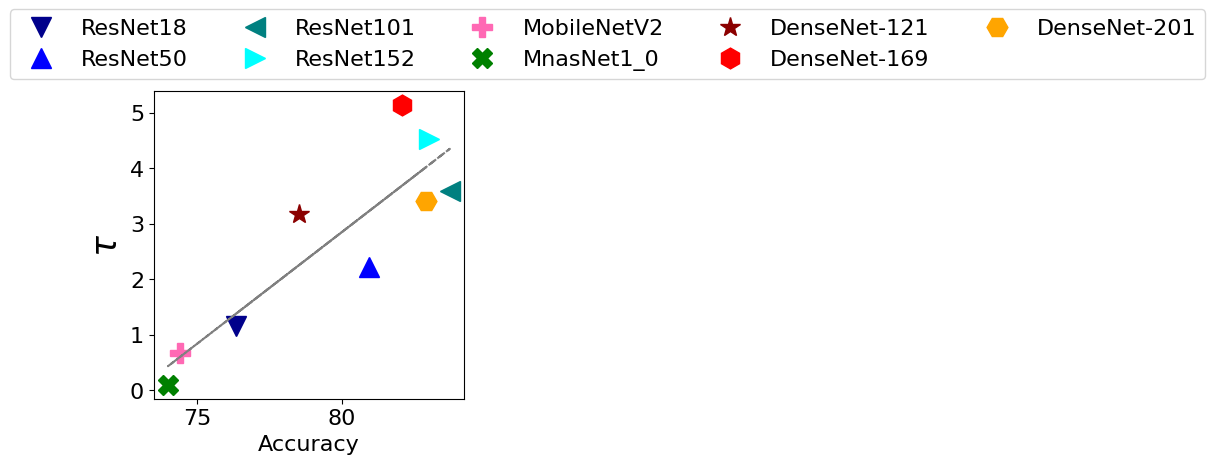

Correlation :  [[1.         0.88374293]
 [0.88374293 1.        ]]
Pearson: Correlation :  0.8837429251483797 : p -value :  0.0015716952438803477
Spearman :Correlation :  0.8666666666666667 : p -value :  0.0024953982859902053
Kendall :Correlation :  0.7222222222222222 : p -value :  0.0058862433862433864


In [9]:
P =  tau.class_plot_figure(acc_cifar10,tauval_cifar10,model_names)
P.plot_fig([],"cifar10_acc_model_label")

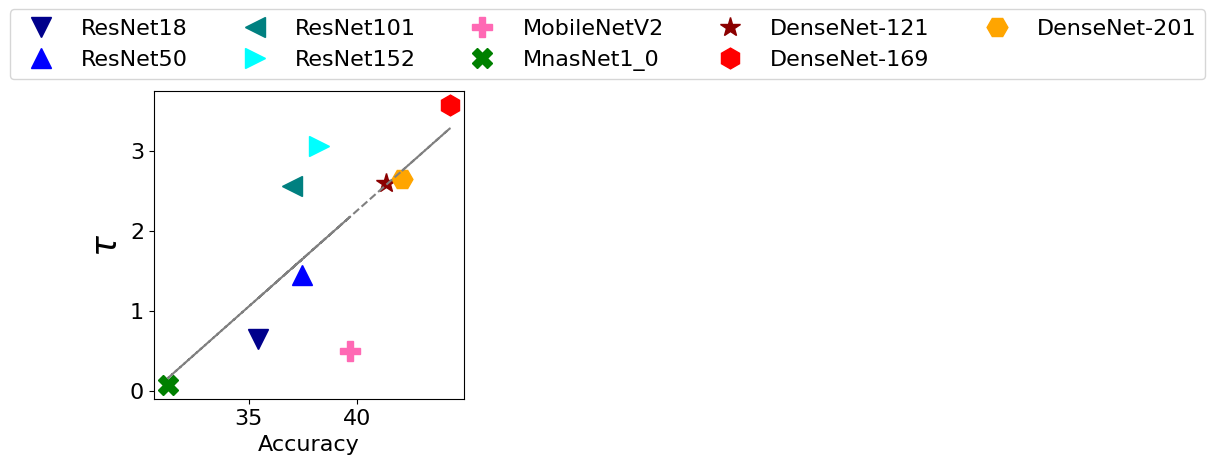

Correlation :  [[1.         0.73855064]
 [0.73855064 1.        ]]
Pearson: Correlation :  0.7385506418477212 : p -value :  0.023042063398783945
Spearman :Correlation :  0.7333333333333334 : p -value :  0.02455415007146968
Kendall :Correlation :  0.611111111111111 : p -value :  0.02474096119929453


In [10]:
P =  tau.class_plot_figure(acc_aircraft,tauval_aircraft,model_names)
P.plot_fig([],"aircraft_acc_model_label")

Text(0, 0.5, 'Layers')

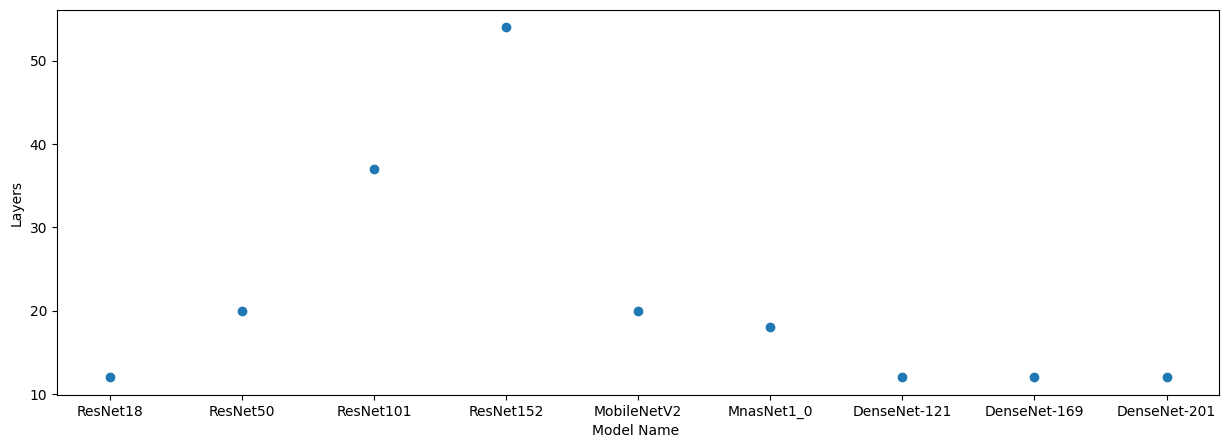

In [11]:
#Note that the number of layers in the model they are different so plot without resnet101 and resnet152
plt.figure(figsize =(15, 5))
values = []
for i in range(model_total):
    values.append(len(all_layers_dgm_stl10[i]))
plt.scatter(model_names,values)
plt.xlabel("Model Name ")
plt.ylabel("Layers")

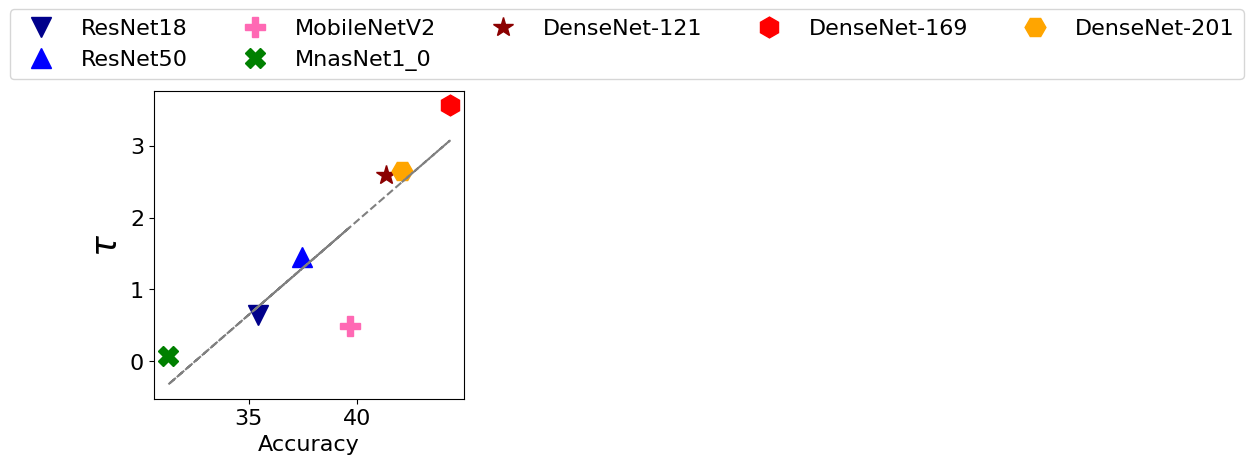

Correlation :  [[1.         0.87599679]
 [0.87599679 1.        ]]
Pearson: Correlation :  0.8759967912384714 : p -value :  0.009717588775224857
Spearman :Correlation :  0.8928571428571429 : p -value :  0.006807187408935392
Kendall :Correlation :  0.8095238095238096 : p -value :  0.010714285714285714


In [12]:
P =  tau.class_plot_figure(acc_aircraft,tauval_aircraft,model_names)
P.plot_fig([2,3],"aircraft_acc_model_label")

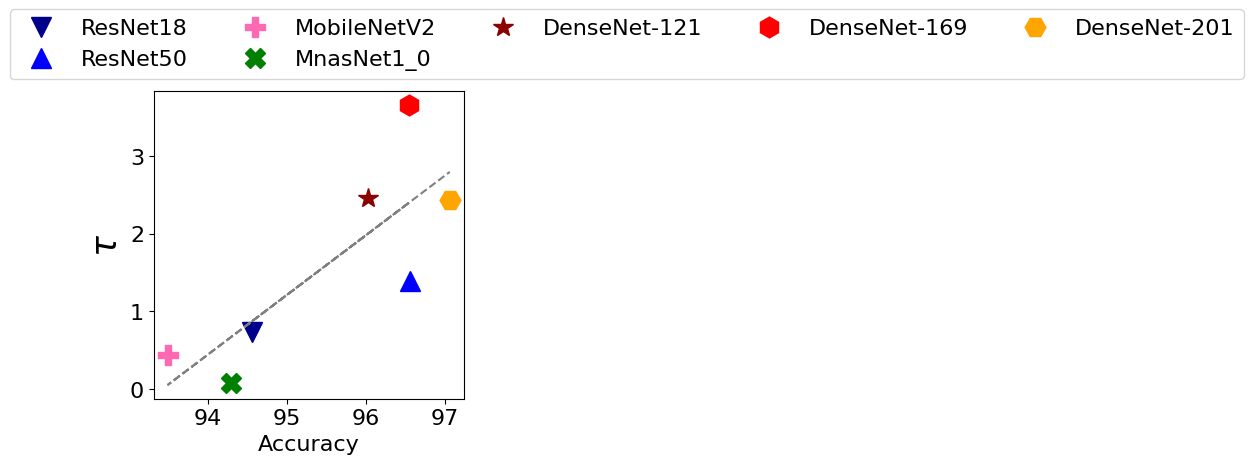

Correlation :  [[1.         0.81065488]
 [0.81065488 1.        ]]
Pearson: Correlation :  0.8106548822983791 : p -value :  0.02698063803907463
Spearman :Correlation :  0.6785714285714287 : p -value :  0.0937502539598313
Kendall :Correlation :  0.5238095238095238 : p -value :  0.1361111111111111


In [18]:
P =  tau.class_plot_figure(acc_stl10,tauval_stl10,model_names)
P.plot_fig([2,3],"stl10_acc_model_label")

In [25]:
#Normalised x axis
acc_cifar10_norm = (acc_cifar10-np.min(acc_cifar10))/(np.max(acc_cifar10)-np.min(acc_cifar10))
acc_stl10_norm  = (acc_stl10-np.min(acc_stl10))/(np.max(acc_stl10)-np.min(acc_stl10))
acc_aircraft_norm = (acc_aircraft-np.min(acc_aircraft))/(np.max(acc_aircraft)-np.min(acc_aircraft))
acc_cifar100_norm = (acc_cifar100-np.min(acc_cifar100))/(np.max(acc_cifar100)-np.min(acc_cifar100))

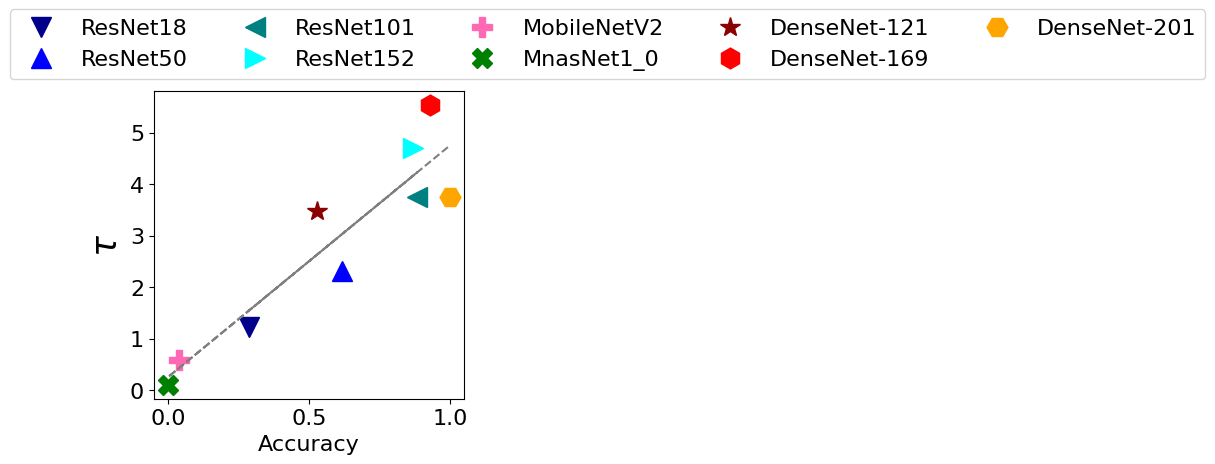

Correlation :  [[1.         0.92466167]
 [0.92466167 1.        ]]
Pearson: Correlation :  0.9246616743282304 : p -value :  0.00035879471930124704
Spearman :Correlation :  0.9 : p -value :  0.0009430623223403293
Kendall :Correlation :  0.7777777777777778 : p -value :  0.0024250440917107582


In [26]:
P =  tau.class_plot_figure(acc_cifar100_norm,tauval_cifar100,model_names)
P.plot_fig([],"cifar100_acc_model_label")